+ Requirements:
    1. The video 'videos/TableHorizRotationUniform_631g7.avi' is used.
    2. The image 'imgs/threshold.jpg' is required.
    3. The estimated time to complete this activity is approximately 1 hour.
<br><br>
+ Objectives of this notebook:
    1. Introduction to OpenCV
    2. To know how to implement image processing algorithms by accessing pixels directly (or with openCV functionality).
<br><br>
+ Summary of activities:
    1. Snippets of image preprocessing code will be analyzed.

%%latex
\tableofcontents
\newpage

# Introducction
Once the images have been captured and loaded into the memory of our processor, they can be transformed in order to facilitate the extraction of the required information and to solve a given application in a robust way. This stage of image processing consists of applying a series of transformations that increase the quality of the acquired image. Therefore, image processing algorithms start from an original image and return another image of higher quality. It is understood that the quality of an image improves when it is easier to extract the desired information from it.

In our case, the function "_,img=video.read()" of the OpenCV video handler or the read method "img=cv2.imread('img_captured.jpg')" stores the image "img" in the processor memory with a Numpy ndarray data type in BGR format. The preprocessing operations can be simple color transformations, which can even be applied via hardware, such as point transforms (applicable via a LUT) or white balances (with adjustment of the gains of the different color channels). In addition, convolutional transformations (low-pass, high-pass filters, etc.), operations between images (differences, normalizations, etc.), geometric transformations (translations, rotations, scaling, etc.), ...


# Introduction to Python and OpenCV
Next, a series of code cells are presented showing some examples of simple transformations by accessing directly to the pixels of the images or applying OpenCV functionality.

In Python you always start by importing all the required modules:

In [1]:
import numpy as np  # the numpy module is associated with the alias np
import cv2          # OpenCV module
import matplotlib.pyplot as plt    # the matplotlib.pyplot with the alias plt
from IPython.display import Image  # Shows an image in the notebook
import time                        # module to mesuare time cost

In [2]:
# **** It is important to consult the help of the version you are using ****
!python --version
print('Numpy:',np.__version__)
print('OpenCv:',cv2.__version__)

Python 3.8.13
Numpy: 1.19.2
OpenCv: 4.5.0


## Select video device

In [3]:
#---------------------------------------------------------------------------
# If you do not have a camera, you can use a video.  
#---------------------------------------------------------------------------
camara_dev = 'videos/TableHorizRotationUniforme_631g7.avi'

#---------------------------------------------------------------------------
# A sequence of numbered real images in a folder can also be used.
#---------------------------------------------------------------------------
#camara_dev = 'imgs/colors/colors_%02d.png'
    
print('Selected device:', camara_dev)

Selected device: videos/TableHorizRotationUniforme_631g7.avi


## Emulation of image acquisition from files

In [4]:
# Open device
video = cv2.VideoCapture(camara_dev)

# Image acquisition: a BGR image is captured
ret_ok, img = video.read()

# Close device
video.release()

if ret_ok:
    print('Image shape: ', img.shape)
    print('Image type:',type(img),'of', img.dtype)
else:
    print('Error: the selected device is not available.')

Image shape:  (288, 380, 3)
Image type: <class 'numpy.ndarray'> of uint8


### Shows image

In [5]:
cv2.imshow('Image', img) # Opens a window to show the image
cv2.waitKey(0)           # Waits until key pressed on the window Image
cv2.destroyAllWindows()  # Closes the window

## Point filters
In this case, the color of the transformed pixel only depends on the original color of the same pixel.

- The following cell shows the Python code that transforms the image "img" into a new image "img_processed" where all pixels that have a maximum value in the red channel are marked as pure red, in BGR [0,0,255]. In addition, the time cost of this transformation is shown.

--- 0.23438000679016113 seconds ---


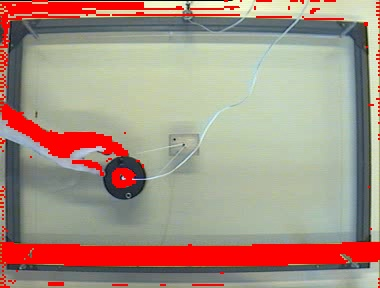

In [6]:
# Copy the image to keep the original image unchanged
img_processed = img.copy()

# Red pixel detection scrolling through all pixels
start_time = time.time()
for x in range(img.shape[0]):
    for y in range(img.shape[1]):
        if (img[x,y,2]>img[x,y,0]) and (img[x,y,2]>img[x,y,1]):
            img_processed[x,y] = [0,0,255]
print("--- %s seconds ---" % (time.time() - start_time))

# Shows the processed image
Image(cv2.imencode('.jpg', img_processed)[1])

- Below is the code that transforms the "img" image from BGR format to gray format, using OpenCV functionality. Then, a thresholding transformation (threshold = 127) is applied on the gray image. Compare with the previous transformation to appreciate the differences in access between a BGR image and a gray image. More information about color space transformations can be found in thise [OpenCV link](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_colorspaces/py_colorspaces.html#converting-colorspaces).

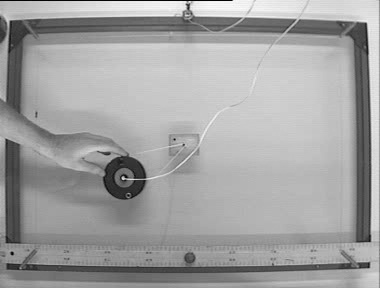

In [7]:
# Conversion to grayscale image from BGR color space
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Shows the processed image
Image(cv2.imencode('.jpg', img_gray)[1])

--- 0.2862398624420166 seconds ---


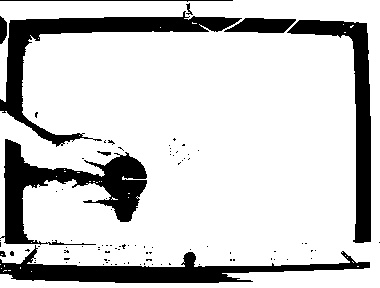

In [15]:
# Copy the gray image to keep it unchanged
img_gray_processed_kk = img_gray.copy()

img_gray_processed = img_gray_processed_kk
# Attention! img_gray_processed is the same image as img_gray_processed_kk

# Applies a threshold filter (threshold = 127)
start_time = time.time()
for x in range(img_gray.shape[0]):
    for y in range(img_gray.shape[1]):
        if img_gray[x,y] <= 127:
            img_gray_processed[x,y] = 0;
        else:
            img_gray_processed[x,y] = 255;
print("--- %s seconds ---" % (time.time() - start_time))

# Attention! Shows img_gray_processed_kk
Image(cv2.imencode('.jpg', img_gray_processed_kk)[1])

Attention! It is important to note that the image assingning "img_gray_processed = img_gray_processed_kk" is done by reference. That is, both variables point to the same memory address. Therefore, after this assignment, if img_gray_processed is modified, img_gray_processed_kk is also modified. To avoid this dependency, the assignment must be made on a copy of the image "img_gray_processed = img_gray_processed_kk.copy()".

In [ ]:
# Faster thresholding by leveraging numpy operations
start_time = time.time()
img_gray_processed = np.zeros(img_gray.shape, dtype=np.uint8)
indices = np.where(img_gray > 127)
img_gray_processed[indices] = 255
print("--- %s seconds ---" % (time.time() - start_time))

# Shows the processed image
Image(cv2.imencode('.jpg', img_gray_processed)[1])

Finally, the code that applies a thresholding transformation on a gray image with OpenCV functionality is shown. It compares the temporal cost of the method in OpenCV with the previous ones. More information about point segmentation transforms can be found in this [OpenCV link](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html).

In [ ]:
# Threshold filter in OpenCV
threshold = 127
start_time = time.time()
ret, img_gray_processed = cv2.threshold(img_gray, threshold, 255, cv2.THRESH_BINARY)
print("--- %s seconds ---" % (time.time() - start_time))

# Shows the processed image
Image(cv2.imencode('.jpg', img_gray_processed)[1])

- Thresholding is a segmentation technique between the pixels of interest and the background. In case you have an image with a bimodal histogram (as shown in the figure below), you can keep the threshold fixed in the center of the histogram valley. In this way, a clearance of the valley width is available to absorb possible variations of the illumination system without segmentation errors.

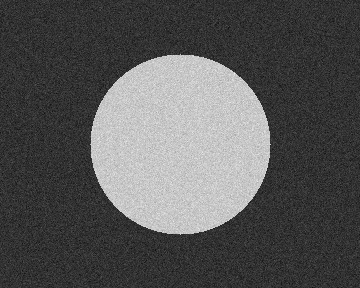

In [24]:
# Reads the image
threshold_img = cv2.imread('imgs/threshold_img.jpg')

# Shows the readed image
Image(cv2.imencode('.jpg', threshold_img)[1])

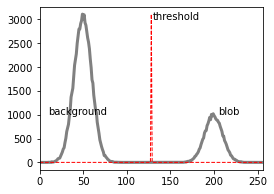

In [29]:
# Shows histogram
fig = plt.subplots(figsize=(4, 3))
hist = cv2.calcHist([threshold_img],[0],None,[256],[0,256])
plt.plot(hist, linewidth=3, color = 'gray')
plt.xlim([0,256])
threshold_mark = np.zeros(256)
threshold_mark[128] = np.max(hist)
plt.plot(threshold_mark, linewidth=1, linestyle='dashed', color = 'red')
plt.text(10,1000,'background')
plt.text(130,3000,'threshold')
plt.text(205,1000,'blob')
plt.show()

## Spatial filters (convolutions)
In this case the new color of the transformed pixel depends on the original color of the same pixel and the colors of its neighboring pixels.

- In the next cell a low pass filter is applied. You can find more information about spatial transformations in this [OpenCV link](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html).

--- 0.007978439331054688 seconds ---


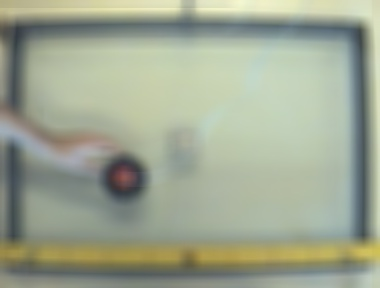

In [30]:
# Applies a low pass filter
start_time = time.time()
img_blur = cv2.blur(img,(15,15))
print("--- %s seconds ---" % (time.time() - start_time))

# Shows the processed image
Image(cv2.imencode('.jpg', img_blur)[1])

- In the next cell a high pass filter is applied. You can find more information about high pass filters in this [OpenCV link](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_gradients/py_gradients.html) or in [this link](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html).

--- 0.002991914749145508 seconds ---


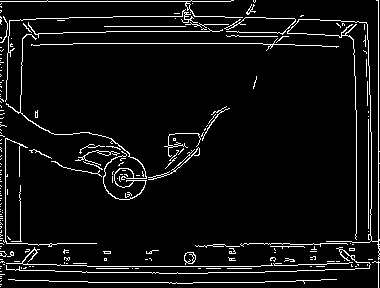

In [31]:
# Applies a high pass filter
start_time = time.time()
img_edges = cv2.Canny(img,100,200)
print("--- %s seconds ---" % (time.time() - start_time))

# Shows the processed image
Image(cv2.imencode('.jpg', img_edges)[1])

## Operations between images
In this case, the processed image is the result of any mathematical operation between pixels of several images.

## Geometric tranformations
In the above processing examples, the colors of the pixels of the original image are transformed to new colors. However, in the geometric transformations the same colors are maintained, but they change their position. Therefore these transformations are defined by a function that relates the coordinates of the resulting pixel to the pixel coordinates of the original image. You can find more information about geometric transformations in this [OpenCV link](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html#geometric-transformations).

- A translation and cropping of the image is applied:

--- 0.007977485656738281 seconds ---


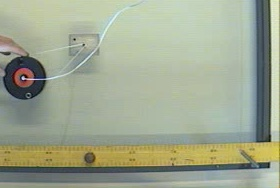

In [32]:
# Defines the translate function
def translate(image, desp=(0, 0)):
    (h, w) = image.shape[:2]
    
    # defines translation matrix
    translation_matrix = np.float32([ [1, 0, desp[0] ], [0, 1, desp[1] ] ])
    translated = cv2.warpAffine(img, translation_matrix, (w, h))
    
    return translated


start_time = time.time()

# translates the image (-100, -100) pixels
desplazamiento = (-100,-100)
img_translated = translate(img, desplazamiento)

# Crops the translated image
(h, w) = img_translated.shape[:2]
crop_img_translated = img_translated[0:h+desplazamiento[0], 0:w+desplazamiento[1]]

print("--- %s seconds ---" % (time.time() - start_time))

# Shows the processed image
Image(cv2.imencode('.jpg', crop_img_translated)[1])

- A rotation is applied:

--- 0.002992391586303711 seconds ---


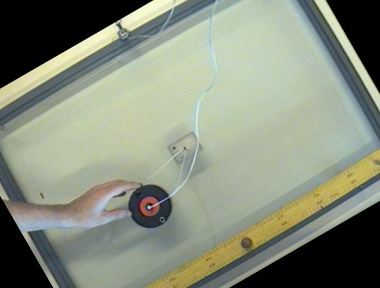

In [33]:
# Defines the rotate function
def rotate(image, angle, center = None, scale = 1.0):
    (h, w) = image.shape[:2]

    if center is None:
        center = (w / 2, h / 2)

    # Perform the rotation
    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(image, M, (w, h))

    return rotated

# Rotates the image 30º
start_time = time.time()
img_rotated = rotate(img, 30)
print("--- %s seconds ---" % (time.time() - start_time))

# Shows the processed image
Image(cv2.imencode('.jpg', img_rotated)[1])

# References
+ [Python documentation](https://docs.python.org/3/)
+ [Numpy documentation](https://numpy.org/doc/)
+ [Documentación de OpenCV 4.5](https://docs.opencv.org/4.5.0/)
+ [Machine Learning for OpenCV 4 - Second Edition
by Vishwesh Ravi Shrimali; Michael Beyeler; Aditya Sharma
Published by Packt Publishing, 2019](https://learning.oreilly.com/library/view/machine-learning-for/9781789536300/cover.xhtml)
+ [Machine Learning for OpenCV 4 : Intelligent Algorithms for Building Image Processing Apps Using OpenCV 4, Python, and Scikit-Learn. by Sharma, Aditya, et al. Second edition., 201](https://polibuscador.upv.es/permalink/f/6ptg6i/alma5191663190003706)
+ [Image processing](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_table_of_contents_imgproc/py_table_of_contents_imgproc.html)